In [1]:
%matplotlib inline
import sys
sys.path.append("..") # Adds the module to path

# deeptrack.optics

This example introduces the module deeptrack.optics

## What is an optical device?

Optical devices are implementations of the abstract class `Features` (see also [features_example](features_example.ipynb)) that image their input through some optical setup. They create a discretized 3-dimensional representation of the input and calculate the corresponding field intensity at the camera. 

The preferred syntax to call an optical device on a feature series `F` is `optics(F)`. Using this syntax, the properties of the optical device is accessible by `F`. However, the syntax `F + optics` is also possible, but in this case, the properties of the optical device are not accessible by `F`.

In [2]:
from deeptrack.scatterers import PointParticle
import numpy as np
import matplotlib.pyplot as plt

## 1. Fluorescence 

The feature `Fluorescence` takes scatterers with the property `intensity`, which represents the intensity of the light emitted by each voxel. 

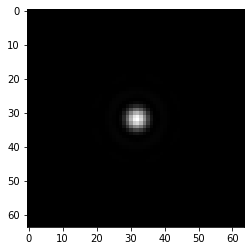

In [3]:
from deeptrack.optics import Fluorescence

optics = Fluorescence(
    NA=0.7,                       # Numerical aperture
    wavelength=660e-9,            # Wavelength of the emitted light
    resolution=1e-6,              # Pixel size of the camera. Also determines z-resolution
    magnification=10,             # Magnification of the optical aperature
    refractive_index_medium=1.33, # Refractive index of the medium
    upscale=2,                    # Upscales the pupil function for accuracy
    padding=(10, 10, 10, 10),     # Pads the imge with this number of pixels to avoid edge effects (left, right, up, down)
    output_region=(0, 0, 64, 64), # Extracts a part of the output image (x, y, width, height)
    aberration=None               # Adds some aberration to the optical system. See aberrations_example for details
)

scatterer = PointParticle(
    intensity=100,         # Squared magnitude of the field. 
    position_unit="pixel", # Units of position (default meter)
    position=(32, 32),     # Position of the particle
)

imaged_scatterer = optics(scatterer)

imaged_scatterer.plot(cmap="gray")

## 2. Brightfield

The feature `Brightfield` coherently illuminates scatterers with the property `refractive_index`, which  represents the refractive_index of the scatterer.

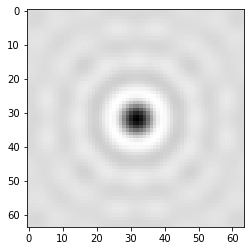

In [4]:
from deeptrack.optics import Brightfield

optics = Brightfield(
    NA=0.7,                             # Numerical aperture
    wavelength=660e-9,                  # Wavelength of illuminating light
    resolution=1e-6,                    # Pixel size of the camera. Also determines z-resolution
    magnification=10,                   # Magnification of the optical aperature
    refractive_index_medium=1.33,       # Refractive index of the medium
    upscale=2,                          # Upscales the pupil function for accuracy
    output_region=(0, 0, 64, 64),       # Extracts a part of the output image (x, y, width, height)
    padding=(10, 10, 10, 10),           # Pads the imge with this number of pixels to avoid edge effects (left, right, up, down)
    aberration=None                     # Adds some aberration to the optical system. See aberrations_example for details
)

scatterer = PointParticle(
    refractive_index=1.45 + 0.1j, # Refractive index the scatterer
    position_unit="pixel",        # Units of position (default meter)
    position=(32, 32),            # Position of the particle
)

imaged_scatterer = optics(scatterer)

imaged_scatterer.plot(cmap="gray")

The illuminating light can be further tuned by setting the property `illumination`. Here, for example, we add a background gradient using the feature `IlluminationGradient`.

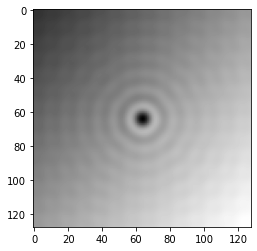

In [26]:
from deeptrack.optics import Brightfield, IlluminationGradient

illumination_gradient = IlluminationGradient(
    gradient=(2e-5, 2e-5) # Adds a field with the corresponing gradient
)

optics = Brightfield(
    NA=0.7,                             # Numerical aperture
    wavelength=660e-9,                  # Wavelength of illuminating light
    resolution=1e-6,                    # Pixel size of the camera. Also determines z-resolution
    magnification=10,                   # Magnification of the optical aperature
    refractive_index_medium=1.33,       # Refractive index of the medium
    upscale=1,                          # Upscales the pupil function for accuracy
    output_region=(0, 0, 128, 128),     # Extracts a part of the output image (x, y, width, height)
    padding=(50, 50, 50, 50),           # Pads the imge with this number of pixels to avoid edge effects (left, right, up, down)
    aberration=None,                    # Adds some aberration to the optical system. See aberrations_example for details.
    illumination=illumination_gradient  # Sets the field illuminating the sample    
)

scatterer = PointParticle(
    refractive_index=1.45 + 0.1j, # Refractive index the scatterer.
    position_unit="pixel",        # Units of position (default meter)
    position=(64, 64),           # Position of the particle
)

imaged_scatterer = optics(scatterer)

imaged_scatterer.plot(cmap="gray")